In [3]:
#Import libraries
os.chdir("/home/robbe/ionbot/Fragpipe_results")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import os
from pathlib import Path
from pyteomics import mass as pymass
import OxiAnalysis as OA
import importlib
importlib.reload(OA)
import warnings; warnings.simplefilter('ignore')

Pseudo:

for each file in project:

    make sets for ionbot en fragpipe (en pfind)

    bereken union en intersection

    tel iedere union en iedere intersection op bij elkaar
    
    steek dit in venn diagram

### Fragpipe

In [4]:
f022545 = pd.read_csv("/home/robbe/ionbot/Fragpipe_results/PXD022545withquant/PXD022545quant.tsv", sep="\t")

In [5]:
f022545.shape

(119985, 38)

In [6]:
f022545["Spectrum File"].unique()

array(['C:\\Users\\robbe\\Fragpipe_results\\PXD022545withquant\\Control_1\\interact.pep.xml',
       'C:\\Users\\robbe\\Fragpipe_results\\PXD022545withquant\\Control_2\\interact.pep.xml',
       'C:\\Users\\robbe\\Fragpipe_results\\PXD022545withquant\\Control_3\\interact.pep.xml',
       'C:\\Users\\robbe\\Fragpipe_results\\PXD022545withquant\\H2O2_1\\interact.pep.xml',
       'C:\\Users\\robbe\\Fragpipe_results\\PXD022545withquant\\H2O2_2\\interact.pep.xml',
       'C:\\Users\\robbe\\Fragpipe_results\\PXD022545withquant\\H2O2_3\\interact.pep.xml'],
      dtype=object)

In [7]:
fragpipe_list = f022545.groupby(["Peptide", "Spectrum File"])["Spectrum"].count().reset_index()

In [8]:
FControl1 = fragpipe_list[fragpipe_list['Spectrum File'].str.contains("Control_1")]
FControl2 = fragpipe_list[fragpipe_list["Spectrum File"].str.contains("Control_2")]
FControl3 = fragpipe_list[fragpipe_list["Spectrum File"].str.contains("Control_3")]
FTreatment1 = fragpipe_list[fragpipe_list["Spectrum File"].str.contains("H2O2_1")]
FTreatment2 = fragpipe_list[fragpipe_list["Spectrum File"].str.contains("H2O2_2")]
FTreatment3 = fragpipe_list[fragpipe_list["Spectrum File"].str.contains("H2O2_3")]
Fragpipesubs = [FControl1, FControl2, FControl3, FTreatment1, FTreatment2, FTreatment3]

In [9]:
FControl1

,Peptide,Spectrum File,Spectrum
0,AAAAAAAAAAK,C:\Users\robbe\Fragpipe_results\PXD022545withq...,2
5,AAAAAAAAAPAAAATAPTTAATTAATAAQ,C:\Users\robbe\Fragpipe_results\PXD022545withq...,1
8,AAAAAAAGDSDSWDADAFSVEDPVRK,C:\Users\robbe\Fragpipe_results\PXD022545withq...,1
10,AAAAAAALQAK,C:\Users\robbe\Fragpipe_results\PXD022545withq...,1
15,AAAAAEQQQFYLLLGNLLSPDNVVR,C:\Users\robbe\Fragpipe_results\PXD022545withq...,1
...,...,...,...
72133,YYHLTHDELISLLLQR,C:\Users\robbe\Fragpipe_results\PXD022545withq...,1
72149,YYTSASGDEMVSLK,C:\Users\robbe\Fragpipe_results\PXD022545withq...,3
72155,YYTVFDR,C:\Users\robbe\Fragpipe_results\PXD022545withq...,2
72160,YYTVFDRDNNR,C:\Users\robbe\Fragpipe_results\PXD022545withq...,1


### ionbot

In [10]:
ionbot = pd.read_csv("/home/robbe/ionbot/full_projects_/PXD022545/PXD022545_first.csv")
ionbot.head()

,Unnamed: 0,ionbot_match_id,spectrum_title,scan,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,...,Organism,Cell line,Oxidant treatment,Oxidant dose (µM),Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting
0,0,0_8_1,controllerType=0 controllerNumber=1 scan=10,10,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,790.34769,790.34568,0.88133,2,EAADTER,...,Human,ARPE-19,None,0,None,0,0,0,NaN,First
1,1,0_7572_1,controllerType=0 controllerNumber=1 scan=10006,10006,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1911.78352,1911.78054,1163.81700,4,SEEAHAEDSVMDHHFR,...,Human,ARPE-19,None,0,None,0,0,0,NaN,First
2,2,0_7573_4,controllerType=0 controllerNumber=1 scan=10007,10007,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,762.36667,762.36603,1163.86404,2,GTFPDAR,...,Human,ARPE-19,None,0,None,0,0,0,NaN,First
3,3,0_7574_2,controllerType=0 controllerNumber=1 scan=10008,10008,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,939.45005,939.44836,1163.91264,2,VMEYINR,...,Human,ARPE-19,None,0,None,0,0,0,NaN,First
4,4,0_7575_1,controllerType=0 controllerNumber=1 scan=10010,10010,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,895.40507,895.40354,1164.25452,2,ESFDGSVR,...,Human,ARPE-19,None,0,None,0,0,0,NaN,First


In [11]:
i = ionbot.groupby(["matched_peptide", "spectrum_file"])["ionbot_match_id"].count().reset_index()
i.head()

,matched_peptide,spectrum_file,ionbot_match_id
0,AAAAAAAAAVSR,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1
1,AAAAAAAGDSDSWDADAFSVEDPVRK,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1
2,AAAAAAALQAK,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1
3,AAAAAAALQAK,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1
4,AAAAAAALQAK,2020-07-14_MS_PG_Proteome_Davide_Casserini_CTR...,1


In [12]:
iControl1 = i[i["spectrum_file"].str.contains("CTRL_01")]
iControl2 = i[i['spectrum_file'].str.contains("CTRL_02")]
iControl3 = i[i['spectrum_file'].str.contains("CTRL_03")]
iTreatment1 = i[i["spectrum_file"].str.contains("H2O2_01")]
iTreatment2 = i[i["spectrum_file"].str.contains("H2O2_02")]
iTreatment3 = i[i["spectrum_file"].str.contains("H2O2_03")]
ionbotsubs = [iControl1, iControl2, iControl3, iTreatment1, iTreatment2, iTreatment3]

### pFind

In [13]:
pFind = pd.read_csv("/home/robbe/ionbot/pFind_results/result/pFind-Filtered.spectra", sep="\t")

In [14]:
p = pFind.groupby(["Sequence", "File_Name"])["Scan_No"].count().reset_index()

In [15]:
pControl1 = p[p["File_Name"].str.contains("CTRL_01")]
pControl2 = p[p['File_Name'].str.contains("CTRL_02")]
pControl3 = p[p['File_Name'].str.contains("CTRL_03")]
pTreatment1 = p[p["File_Name"].str.contains("H2O2_01")]
pTreatment2 = p[p["File_Name"].str.contains("H2O2_02")]
pTreatment3 = p[p["File_Name"].str.contains("H2O2_03")]
pFindsubs = [pControl1, pControl2, pControl3, pTreatment1, pTreatment2, pTreatment3]

In [16]:
pControl1.shape

(6256, 3)

In [17]:
iControl1.shape

(14758, 3)

In [18]:
FControl1.shape

(14572, 3)

### plots

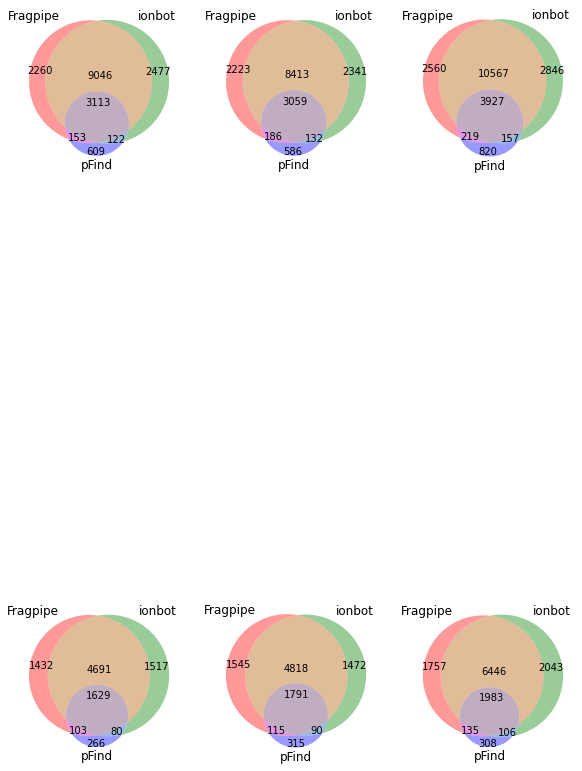

In [19]:
from matplotlib_venn import venn3

Tot = 6
Cols = 3
# Compute Rows required

Rows = Tot // Cols 

#     EDIT for correct number of rows:
#     If one additional row is necessary -> add one:

if Tot % Cols != 0:
    Rows += 1

# Create a Position index

Position = range(1,Tot + 1)
fig = plt.figure(1)
fig.set_size_inches(10,20)
for k in range(Tot):

    ax = fig.add_subplot(Rows,Cols,Position[k])
       # Or whatever you want in the subplot

    fragpipesub = Fragpipesubs[k]
    ionbotsub = ionbotsubs[k]
    pFindsub = pFindsubs[k]
    fragpipeset = set(fragpipesub["Peptide"])
    ionbotset = set(ionbotsub["matched_peptide"])
    pfindset = set(pFindsub["Sequence"])
    
    venn3([fragpipeset, ionbotset, pfindset], ('Fragpipe', 'ionbot', 'pFind'))
plt.show()
    

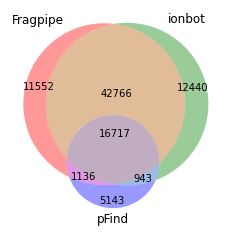

In [20]:
venn3(subsets = ((2204+2176+2513+1410+1527+1722),(2423+2291+2798+1488+1445+1995), (8746+8185+10270+4608+4715+6242),(1148+1003+1357+466+540+629),(209+233+266+125+133+170),(176+182+205+109+117+154),(3413+3287+4224+1712+1894+2187)), set_labels = ('Fragpipe', 'ionbot', 'pFind'))

Comparison at unique peptide sequence level

## MSFragger Fingerprint

## FlashLFQ

In [21]:
FragFlash = pd.read_csv("/home/robbe/ionbot/Fragpipe_results/PXD022545/flashlfq/QuantifiedPeptides.tsv", sep= "\t")
FragFlash.drop(list(FragFlash.filter(regex = 'Detection Type')), axis = 1, inplace = True)
FragFlash = FragFlash[~FragFlash["Protein Groups"].isin(OA.nonhumancontams)]


In [22]:
cols = ['Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234',
       'Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719',
       'Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239',
       'Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01',
       'Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02',
       'Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03']

In [23]:
OA.quantile_transform(FragFlash, cols)

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Unnamed: 17
0,AAAAAAAAAAK|nan|nan,AAAAAAAAAAK,P50914,NaN,NaN,3.397480,3.603208,3.209464,3.603449,NaN,2.664026,NaN
1,AAAAAAAAAPAAAATAPTTAATTAATAAQ|nan|nan,AAAAAAAAAPAAAATAPTTAATTAATAAQ,P37108,NaN,NaN,4.468616,4.608479,4.783898,4.938050,3.550408,4.374632,NaN
2,AAAAAAAGDSDSWDADAFSVEDPVRK|N-term(42.0106)|Mod...,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAAAAAGDSDSWDADAFSVEDPVRK|N-term(42.0106)|nan,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,NaN,NaN,4.414644,4.314243,4.043025,4.988288,3.312103,4.913074,NaN
4,AAAAAAALQAK|nan|nan,AAAAAAALQAK,P36578,NaN,NaN,6.422033,6.087358,6.788210,6.284876,6.009010,6.657025,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
39449,YYTVFDR|nan|nan,YYTVFDR,P07339,NaN,NaN,6.562819,6.740807,6.711051,6.795794,6.641315,6.726815,NaN
39450,YYTVFDRDNNR|nan|nan,YYTVFDRDNNR,P07339,NaN,NaN,5.828379,3.993736,4.368801,6.031489,6.178575,6.079884,NaN
39451,YYVTIIDAPGHR|nan|nan,YYVTIIDAPGHR,Q5VTE0,NaN,NaN,6.801665,6.883801,7.136698,6.645284,6.365893,7.162604,NaN
39452,YYVTIIDAPGHRDFIK|nan|nan,YYVTIIDAPGHRDFIK,Q5VTE0,NaN,NaN,5.329524,5.577210,5.975927,4.794421,2.626899,5.796735,NaN


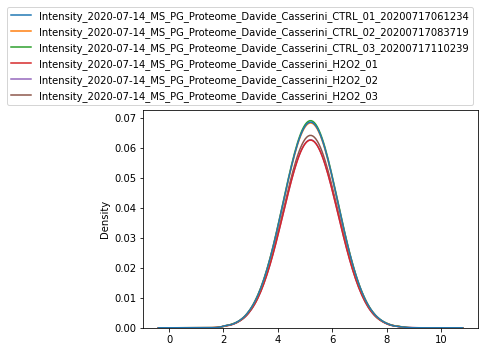

In [24]:
ax = sns.kdeplot(data=FragFlash[cols])
sns.move_legend(ax, "lower right", bbox_to_anchor=(1, 1))

In [25]:
FragFlash["Assigned Mods"] = FragFlash["Sequence"].apply(lambda x: x.split("|")[1])
FragFlash["Open Mods"] = FragFlash["Sequence"].apply(lambda x: x.split("|")[2])

In [26]:
FragFlash

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Unnamed: 17,Assigned Mods,Open Mods
0,AAAAAAAAAAK|nan|nan,AAAAAAAAAAK,P50914,NaN,NaN,3.397480,3.603208,3.209464,3.603449,NaN,2.664026,NaN,nan,nan
1,AAAAAAAAAPAAAATAPTTAATTAATAAQ|nan|nan,AAAAAAAAAPAAAATAPTTAATTAATAAQ,P37108,NaN,NaN,4.468616,4.608479,4.783898,4.938050,3.550408,4.374632,NaN,nan,nan
2,AAAAAAAGDSDSWDADAFSVEDPVRK|N-term(42.0106)|Mod...,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N-term(42.0106),"Mod1: First isotopic peak, Mod2: monomethylati..."
3,AAAAAAAGDSDSWDADAFSVEDPVRK|N-term(42.0106)|nan,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,NaN,NaN,4.414644,4.314243,4.043025,4.988288,3.312103,4.913074,NaN,N-term(42.0106),nan
4,AAAAAAALQAK|nan|nan,AAAAAAALQAK,P36578,NaN,NaN,6.422033,6.087358,6.788210,6.284876,6.009010,6.657025,NaN,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39449,YYTVFDR|nan|nan,YYTVFDR,P07339,NaN,NaN,6.562819,6.740807,6.711051,6.795794,6.641315,6.726815,NaN,nan,nan
39450,YYTVFDRDNNR|nan|nan,YYTVFDRDNNR,P07339,NaN,NaN,5.828379,3.993736,4.368801,6.031489,6.178575,6.079884,NaN,nan,nan
39451,YYVTIIDAPGHR|nan|nan,YYVTIIDAPGHR,Q5VTE0,NaN,NaN,6.801665,6.883801,7.136698,6.645284,6.365893,7.162604,NaN,nan,nan
39452,YYVTIIDAPGHRDFIK|nan|nan,YYVTIIDAPGHRDFIK,Q5VTE0,NaN,NaN,5.329524,5.577210,5.975927,4.794421,2.626899,5.796735,NaN,nan,nan


Oke, doe dit:
- Als er een theoretical peak is: pak die
- Als er meerdere theoretical peaks zijn: pak gemiddelde (zou normaal toch heel dicht bij mekaar moeten liggen)
- Als er geen theoretical peak is: pak peakApex, als er meerdere peakApex zijn, neem gemiddelde van peakApex (zou normaal heel dicht bij elkaar moeten liggen)

In [27]:
FragFlash["Assigned Mass Shift"] = FragFlash["Assigned Mods"].str.findall(r"\((.*?)\)")
FragFlash["Assigned Mass Shift"].fillna(0, inplace=True)
FragFlash["Assigned Mass Shift"] = FragFlash["Assigned Mass Shift"].apply(lambda x: [float(i) for i in x] if type(x)==list else x)
FragFlash["Assigned Mass Shift"] = FragFlash["Assigned Mass Shift"].apply(lambda x: sum(x) if type(x) == list else x)

In [28]:
def openMassShift(string):
    masshift = 0
    theoretical = re.compile(r"Theoretical: (.*?)\)")
    theoreticallist= re.findall(pattern= theoretical, string=string)
    tmp = 0
    if len(theoreticallist) != 0:
        for i in theoreticallist:
            tmp += float(i)
        masshift = tmp/len(theoreticallist)
    else:
        peakapex = re.compile(r"PeakApex: (.*?)\)")
        peakapexlist = re.findall(pattern=peakapex, string=string)
        if len(peakapexlist) > 0:
            for i in peakapexlist:
                tmp += float(i)
            masshift = tmp/len(peakapexlist)
        else:
            masshift = 0
    
    return masshift

In [29]:
FragFlash["Open Mass Shift"] = FragFlash["Open Mods"].apply(openMassShift)
FragFlash["Total Mass Shift"] = (FragFlash["Open Mass Shift"] + FragFlash["Assigned Mass Shift"]).round(2)

In [30]:
FragFlash.head()

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Unnamed: 17,Assigned Mods,Open Mods,Assigned Mass Shift,Open Mass Shift,Total Mass Shift
0,AAAAAAAAAAK|nan|nan,AAAAAAAAAAK,P50914,NaN,NaN,3.397480,3.603208,3.209464,3.603449,NaN,2.664026,NaN,nan,nan,0.0000,0.0000,0.00
1,AAAAAAAAAPAAAATAPTTAATTAATAAQ|nan|nan,AAAAAAAAAPAAAATAPTTAATTAATAAQ,P37108,NaN,NaN,4.468616,4.608479,4.783898,4.938050,3.550408,4.374632,NaN,nan,nan,0.0000,0.0000,0.00
2,AAAAAAAGDSDSWDADAFSVEDPVRK|N-term(42.0106)|Mod...,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N-term(42.0106),"Mod1: First isotopic peak, Mod2: monomethylati...",42.0106,19.0302,61.04
3,AAAAAAAGDSDSWDADAFSVEDPVRK|N-term(42.0106)|nan,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,NaN,NaN,4.414644,4.314243,4.043025,4.988288,3.312103,4.913074,NaN,N-term(42.0106),nan,42.0106,0.0000,42.01
4,AAAAAAALQAK|nan|nan,AAAAAAALQAK,P36578,NaN,NaN,6.422033,6.087358,6.788210,6.284876,6.009010,6.657025,NaN,nan,nan,0.0000,0.0000,0.00


In [31]:
No_zero = FragFlash[FragFlash["Total Mass Shift"] != 0]
g = No_zero.groupby("Total Mass Shift").sum().reset_index()

In [32]:
g

,Total Mass Shift,Gene Names,Organism,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Unnamed: 17,Assigned Mass Shift,Open Mass Shift
0,-144.05,0.0,0.0,27.526705,26.804981,25.750584,21.262841,20.459709,20.046408,0.0,0.0000,-720.2670
1,-137.06,0.0,0.0,10.898722,10.826767,11.109270,11.434921,11.277824,10.942463,0.0,0.0000,-274.1178
2,-128.10,0.0,0.0,49.847087,54.596098,47.573279,38.630756,27.334706,20.992170,0.0,0.0000,-2433.8050
3,-128.06,0.0,0.0,16.461912,9.874129,10.184584,13.925787,16.245617,9.865226,0.0,0.0000,-384.1758
4,-127.11,0.0,0.0,25.494591,25.679358,25.644613,24.011263,24.842978,25.242636,0.0,0.0000,-635.5540
...,...,...,...,...,...,...,...,...,...,...,...,...
926,497.25,0.0,0.0,11.140406,13.075005,12.483533,12.413279,12.616628,12.895948,0.0,0.0000,1491.7482
927,529.19,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,529.1875,0.0000
928,551.20,0.0,0.0,4.449823,11.387811,4.484107,9.973892,8.768017,8.840106,0.0,114.0428,988.3496
929,604.22,0.0,0.0,4.901766,4.018047,5.084964,4.513921,4.719555,5.448224,0.0,114.0428,490.1742


In [33]:
from statistics import median
g['medianCtrl']=g.apply(lambda x:median([x[c] for c in g.columns if "CTRL" in c]),axis=1)
g["medianH2O2"]=g.apply(lambda x:median([x[c] for c in g.columns if "H2O2" in c]), axis=1)
g["Difference"] = (g["medianH2O2"] - g["medianCtrl"])

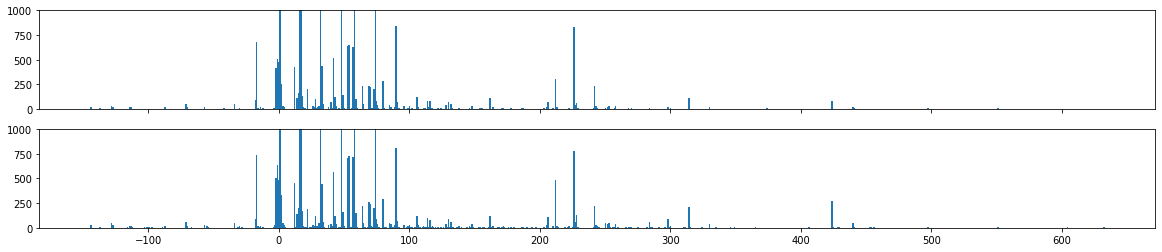

In [34]:
fig, (ax1,ax2) = plt.subplots(ncols = 1, nrows=2, sharey = True, sharex=True)
# sns.barplot(ax = axes[0], data=gfiltered, x="Delta_mass", y="meanH2O2")
# sns.barplot(ax = axes[1], data=gfiltered, x="Delta_mass", y="meanCtrl")
ax1.bar(x=g["Total Mass Shift"], height=g.medianH2O2, width=1.2)
ax2.bar(x=g["Total Mass Shift"], height=g.medianCtrl, width=1.2)

fig.set_size_inches(20,4)
plt.ylim(0,1000)
plt.show()

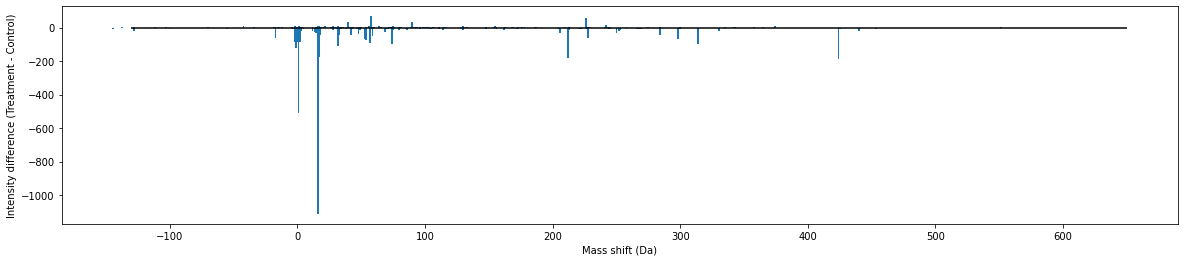

In [35]:
fig, ax = plt.subplots()
# ax = sns.barplot(data=gfiltered, x="Delta_mass", y="Quotient")
ax.bar(x=g["Total Mass Shift"], height=g.Difference, width=1.4)
fig.set_size_inches(20,4)
plt.hlines(y=0,xmin=-130, xmax=650, color="k")
plt.xlabel("Mass shift (Da)")
plt.ylabel("Intensity difference (Treatment - Control)")
# plt.ylim(0,7000)
# plt.xticks([0,10,20,30,40,50,60,70,80,90,100])

plt.show()

In [36]:
sorted = g.sort_values(by="Difference", axis=0, ascending=False)

In [37]:
FragFlash[FragFlash["Total Mass Shift"] == 226]

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Unnamed: 17,Assigned Mods,Open Mods,Assigned Mass Shift,Open Mass Shift,Total Mass Shift
485,ACANPAAGSVILLENLR|2C(57.0214)|Mod1: Unannotate...,ACANPAAGSVILLENLR,P00558,NaN,NaN,4.708752,4.205068,4.581274,3.940905,5.290136,4.228471,NaN,2C(57.0214),Mod1: Unannotated mass-shift 168.9756 (PeakApe...,57.0214,168.9756,226.0
505,ACLISLGYDVENDRQGEAEFNR|2C(57.0214)|Mod1: Unann...,ACLISLGYDVENDRQGEAEFNR,O43707,NaN,NaN,4.804457,4.076568,4.628334,3.842841,4.694823,4.607658,NaN,2C(57.0214),Mod1: Unannotated mass-shift 168.9756 (PeakApe...,57.0214,168.9756,226.0
576,ADFCIIHYAGK|4C(57.0214)|Mod1: Unannotated mass...,ADFCIIHYAGK,P35579,NaN,NaN,5.376787,4.576856,5.244237,5.108213,5.014899,5.680228,NaN,4C(57.0214),Mod1: Unannotated mass-shift 168.9756 (PeakApe...,57.0214,168.9756,226.0
615,ADHQPLTEASYVNLPTIALCNTDSPLR|20C(57.0214)|Mod1:...,ADHQPLTEASYVNLPTIALCNTDSPLR,P08865,NaN,NaN,6.063072,5.379714,5.591825,5.877157,6.285831,6.308253,NaN,20C(57.0214),Mod1: Unannotated mass-shift 168.9756 (PeakApe...,57.0214,168.9756,226.0
872,AEGSDVANAVLDGADCIMLSGETAK|16C(57.0214)|Mod1: U...,AEGSDVANAVLDGADCIMLSGETAK,P14618,NaN,NaN,4.233593,NaN,4.048279,NaN,4.285218,5.104440,NaN,16C(57.0214),Mod1: Unannotated mass-shift 168.9756 (PeakApe...,57.0214,168.9756,226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38311,YDGSTIVPGEQGAEYQHFIQQCTDDVR|22C(57.0214)|Mod1:...,YDGSTIVPGEQGAEYQHFIQQCTDDVR,Q14019,NaN,NaN,5.924155,5.404391,5.572441,5.708267,5.861802,5.514300,NaN,22C(57.0214),Mod1: Unannotated mass-shift 168.9756 (PeakApe...,57.0214,168.9756,226.0
38339,YDNMHIPGSPLQFYVDYVNCGHVTAYGPGLTHGVVNK|20C(57.0...,YDNMHIPGSPLQFYVDYVNCGHVTAYGPGLTHGVVNK,P21333,NaN,NaN,4.336345,2.979136,3.543967,4.284686,4.852581,4.399012,NaN,20C(57.0214),Mod1: Unannotated mass-shift 168.9756 (PeakApe...,57.0214,168.9756,226.0
38910,YLVLFFYPLDFTFVCPTEIVAFSDK|15C(57.0214)|Mod1: U...,YLVLFFYPLDFTFVCPTEIVAFSDK,P30048,NaN,NaN,NaN,NaN,NaN,NaN,4.773666,3.488967,NaN,15C(57.0214),Mod1: Unannotated mass-shift 168.9756 (PeakApe...,57.0214,168.9756,226.0
39319,YVEPIEDVPCGNIVGLVGVDQFLVK|10C(57.0214)|Mod1: U...,YVEPIEDVPCGNIVGLVGVDQFLVK,P13639,NaN,NaN,3.976283,4.124187,4.349041,4.378119,NaN,4.772760,NaN,10C(57.0214),Mod1: Unannotated mass-shift 168.9756 (PeakApe...,57.0214,168.9756,226.0


In [38]:
sorted.head(10)

,Total Mass Shift,Gene Names,Organism,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Unnamed: 17,Assigned Mass Shift,Open Mass Shift,medianCtrl,medianH2O2,Difference
511,58.01,0.0,0.0,2849.695022,2754.034219,2710.534494,2653.506504,2829.969104,2821.636894,0.0,38328.6952,4653.414800,2754.034219,2821.636894,67.602675
830,226.00,0.0,0.0,833.294637,704.106652,776.963195,808.977719,842.196119,832.112933,0.0,9611.5850,28581.915700,776.963195,832.112933,55.149738
637,90.00,0.0,0.0,810.738839,848.963876,776.511096,846.162294,857.863594,801.801763,0.0,14107.1975,3261.937300,810.738839,846.162294,35.423455
391,40.03,0.0,0.0,70.054972,40.794693,36.434154,70.887689,95.534231,74.057073,0.0,0.0000,760.594700,40.794693,74.057073,33.262380
844,241.99,0.0,0.0,252.230144,205.433500,216.381195,217.754908,240.396098,230.706693,0.0,3636.8986,8946.683200,216.381195,230.706693,14.325498
294,21.98,0.0,0.0,185.367860,210.981485,189.080353,201.600906,201.264814,188.922611,0.0,0.0000,1033.114717,189.080353,201.264814,12.184461
730,130.04,0.0,0.0,34.921437,38.127812,42.662164,45.828148,50.155040,49.639168,0.0,2340.6786,0.000000,38.127812,49.639168,11.511356
244,16.94,0.0,0.0,43.378758,47.835887,67.807816,68.947872,43.573143,59.290212,0.0,335.8929,19.810000,47.835887,59.290212,11.454325
63,-1.98,0.0,0.0,24.056119,36.236595,24.733360,48.259913,35.499515,24.408939,0.0,0.0000,-31.673600,24.733360,35.499515,10.766155
219,15.95,0.0,0.0,15.449521,4.668883,4.920749,14.563820,15.131976,15.015774,0.0,47.9847,-0.127800,4.920749,15.015774,10.095025


In [39]:
sorted.tail(10)

,Total Mass Shift,Gene Names,Organism,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_01_20200717061234,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_02_20200717083719,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_CTRL_03_20200717110239,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_01,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_02,Intensity_2020-07-14_MS_PG_Proteome_Davide_Casserini_H2O2_03,Unnamed: 17,Assigned Mass Shift,Open Mass Shift,medianCtrl,medianH2O2,Difference
495,57.02,0.0,0.0,725.261585,709.263557,716.398180,602.983601,626.218470,631.201360,0.0,16308.1204,0.0000,716.398180,626.218470,-90.179710
588,74.00,0.0,0.0,3103.478974,3037.169381,2977.275708,2940.035623,2966.457630,2908.514514,0.0,40608.3832,9638.0808,3037.169381,2940.035623,-97.133759
897,314.14,0.0,0.0,210.599466,218.691886,193.373857,107.479061,111.462415,116.467225,0.0,63.9796,14072.2022,210.599466,111.462415,-99.137051
335,31.99,0.0,0.0,4529.931281,4582.128471,4591.489349,4486.523892,4472.228288,4448.809066,0.0,17722.3492,14299.4406,4582.128471,4472.228288,-109.900182
81,-1.00,0.0,0.0,583.398772,630.715386,634.269849,466.938018,511.457793,540.765079,0.0,0.0000,-241.5784,630.715386,511.457793,-119.257593
250,17.00,0.0,0.0,1173.110162,1169.236442,1231.393120,991.470068,996.910283,1060.012996,0.0,10796.5575,1135.6245,1173.110162,996.910283,-176.199879
816,212.03,0.0,0.0,478.035386,485.793286,487.107425,285.018007,311.963002,301.274444,0.0,0.0000,28199.5112,485.793286,301.274444,-184.518842
912,424.05,0.0,0.0,267.375554,285.883415,230.412218,72.962731,89.547581,80.084236,0.0,0.0000,28835.5496,267.375554,80.084236,-187.291318
129,1.00,0.0,0.0,3248.535746,3181.403064,3387.193173,2545.668925,2764.392145,2736.778957,0.0,0.0000,2358.6472,3248.535746,2736.778957,-511.756788
223,15.99,0.0,0.0,17281.273329,17319.044368,17606.521216,16206.072699,16187.968242,16694.545191,0.0,58897.3788,123.8020,17319.044368,16206.072699,-1112.971669


Deamidation way more strongly different in fragpipe than by ionbot

